# **DateTime in Pandas**

In [1]:
import pandas as pd
import numpy as np

### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [4]:
# creating a timestamp
# preferable to give format like
# this: "Year/Month/Day"
type(pd.Timestamp('2023/1/05'))

pandas._libs.tslibs.timestamps.Timestamp

In [5]:
# variations
pd.Timestamp("2023-1-5")
pd.Timestamp("2023, 1, 5")

Timestamp('2023-01-05 00:00:00')

In [6]:
# using text
pd.Timestamp("13th january 2023")

Timestamp('2023-01-13 00:00:00')

In [9]:
# providing time also
pd.Timestamp("13th january 2023 6:49PM")

Timestamp('2023-01-13 18:49:00')

In [10]:
# AM and PM

In [17]:
# using datetime.datetime object of python
import datetime as dt

#always remember Timestamp is of pandas
# and datetime is of python , but
# both are work same way


x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))

In [16]:
# fetching attributes 
x.year
x.month
x.day
x.second

56

# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [18]:
import numpy as np
date = np.array('2023-07-04',dtype=np.datetime64)

In [19]:
date + np.arange(12)

array(['2023-07-04', '2023-07-05', '2023-07-06', '2023-07-07',
       '2023-07-08', '2023-07-09', '2023-07-10', '2023-07-11',
       '2023-07-12', '2023-07-13', '2023-07-14', '2023-07-15'],
      dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large 

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [23]:
# from strings
type(pd.DatetimeIndex(['2023/1/13','2022/1/13','2021/1/13']))

pandas.core.indexes.datetimes.DatetimeIndex

In [25]:
# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,13),dt.datetime(2022,1,13),dt.datetime(2021,1,13)])

DatetimeIndex(['2023-01-13', '2022-01-13', '2021-01-13'], dtype='datetime64[ns]', freq=None)

In [27]:
# using pd.Timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,13),pd.Timestamp(2022,1,13),pd.Timestamp(2021,1,13)])

In [28]:
#using datetimeindex as index of the series

pd.Series([1,2,3],index=dt_index)

2023-01-13    1
2022-01-13    2
2021-01-13    3
dtype: int64

# ``date_range`` function

In [31]:
# generate daily dates in a given range
pd.date_range(start ='2023/1/13',end = '2023/1/31',freq='D')

DatetimeIndex(['2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16',
               '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20',
               '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28',
               '2023-01-29', '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [32]:
# alternate days in a given range
pd.date_range(start ='2023/1/13',end = '2023/1/31',freq='3D') #2-2 din chod kar

DatetimeIndex(['2023-01-13', '2023-01-16', '2023-01-19', '2023-01-22',
               '2023-01-25', '2023-01-28', '2023-01-31'],
              dtype='datetime64[ns]', freq='3D')

In [34]:
# B-> business days 
# skipped the business days that is saturday and sunday
pd.date_range(start ='2023/1/13',end = '2023/1/31',freq='B')

DatetimeIndex(['2023-01-13', '2023-01-16', '2023-01-17', '2023-01-18',
               '2023-01-19', '2023-01-20', '2023-01-23', '2023-01-24',
               '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-30',
               '2023-01-31'],
              dtype='datetime64[ns]', freq='B')

In [37]:
# W -> one week per day
# let suppose i want `saturday` only 
pd.date_range(start ='2023/1/13',end = '2023/1/31',freq='W-SAT')

DatetimeIndex(['2023-01-14', '2023-01-21', '2023-01-28'], dtype='datetime64[ns]', freq='W-SAT')

In [38]:
# H-> Hourly data
pd.date_range(start ='2023/1/13',end = '2023/1/31',freq='H')

DatetimeIndex(['2023-01-13 00:00:00', '2023-01-13 01:00:00',
               '2023-01-13 02:00:00', '2023-01-13 03:00:00',
               '2023-01-13 04:00:00', '2023-01-13 05:00:00',
               '2023-01-13 06:00:00', '2023-01-13 07:00:00',
               '2023-01-13 08:00:00', '2023-01-13 09:00:00',
               ...
               '2023-01-30 15:00:00', '2023-01-30 16:00:00',
               '2023-01-30 17:00:00', '2023-01-30 18:00:00',
               '2023-01-30 19:00:00', '2023-01-30 20:00:00',
               '2023-01-30 21:00:00', '2023-01-30 22:00:00',
               '2023-01-30 23:00:00', '2023-01-31 00:00:00'],
              dtype='datetime64[ns]', length=433, freq='H')

In [40]:
# Every 6 hour  data
pd.date_range(start ='2023/1/13',end = '2023/1/31',freq='6H')

DatetimeIndex(['2023-01-13 00:00:00', '2023-01-13 06:00:00',
               '2023-01-13 12:00:00', '2023-01-13 18:00:00',
               '2023-01-14 00:00:00', '2023-01-14 06:00:00',
               '2023-01-14 12:00:00', '2023-01-14 18:00:00',
               '2023-01-15 00:00:00', '2023-01-15 06:00:00',
               '2023-01-15 12:00:00', '2023-01-15 18:00:00',
               '2023-01-16 00:00:00', '2023-01-16 06:00:00',
               '2023-01-16 12:00:00', '2023-01-16 18:00:00',
               '2023-01-17 00:00:00', '2023-01-17 06:00:00',
               '2023-01-17 12:00:00', '2023-01-17 18:00:00',
               '2023-01-18 00:00:00', '2023-01-18 06:00:00',
               '2023-01-18 12:00:00', '2023-01-18 18:00:00',
               '2023-01-19 00:00:00', '2023-01-19 06:00:00',
               '2023-01-19 12:00:00', '2023-01-19 18:00:00',
               '2023-01-20 00:00:00', '2023-01-20 06:00:00',
               '2023-01-20 12:00:00', '2023-01-20 18:00:00',
               '2023-01-

In [47]:
# M - > Month end

pd.date_range(start ='2023/1/1',end = '2023/1/31',freq='M')

DatetimeIndex(['2023-01-31'], dtype='datetime64[ns]', freq='M')

In [50]:
# MS - > Month start

pd.date_range(start ='2023/1/1',end = '2023/1/31',freq='MS')

DatetimeIndex(['2023-01-01'], dtype='datetime64[ns]', freq='MS')

In [53]:
# A-> Year end


pd.date_range(start ='2023/1/13',end = '2024/1/31',freq='A')

DatetimeIndex(['2023-12-31'], dtype='datetime64[ns]', freq='A-DEC')

In [67]:
# using periods= (number of results)
# next days want to extract from 'start'

pd.date_range(start ='2023/1/13',periods=6,freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30'],
              dtype='datetime64[ns]', freq='M')

# **to_datetime functioninging**
converts an existing objects to pandas timestamp/datetimeindex object

In [76]:
# simple series example

s=pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [81]:
# with errors
s=pd.Series(['2023/111/1','2022/1/1','2021/1/1'])
pd.to_datetime(s,errors='coerce')
# coerce means ignore the incorrect format
# of date

0          NaT
1   2022-01-01
2   2021-01-01
dtype: datetime64[ns]

In [82]:
df = pd.read_csv("expense_data.csv")
df.shape

(277, 11)

In [83]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [90]:
# converting from object or str type to datetime
df['Date']=pd.to_datetime(df['Date'])

In [91]:
df['Date']

0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

### dt accessor

Accessor object for datetimelike properties of the Series values.

In [103]:
df['Date'].dt.is_quarter_end
df['Date'].dt.is_quarter_start
df['Date'].dt.month_name()
df['Date'].dt.is_month_end
df['Date'].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

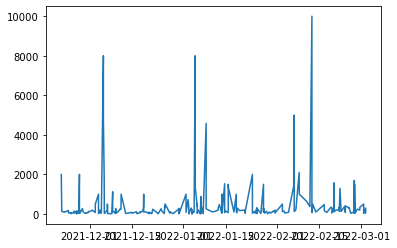

In [104]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [108]:
# day name wise bar chart/month wise bar chart

df['day_name']=df['Date'].dt.day_name()

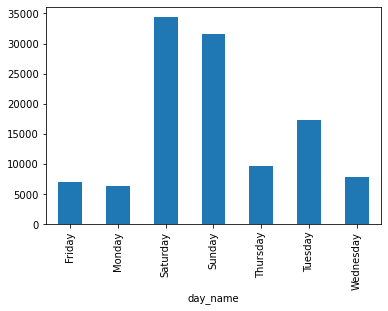

In [111]:
df.groupby("day_name")['INR'].sum().plot(kind='bar');

In [112]:
df['month_name']=df['Date'].dt.month_name()

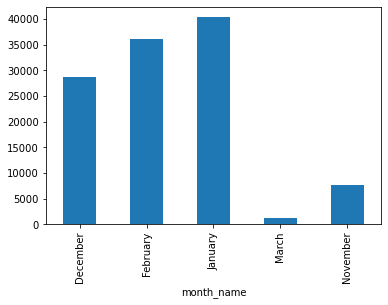

In [114]:
df.groupby("month_name")['INR'].sum().plot(kind='bar');

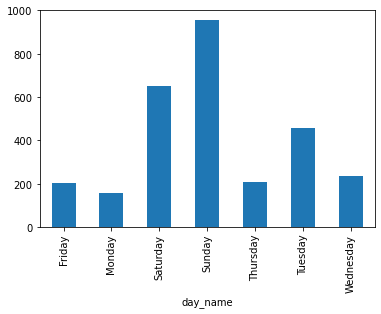

In [115]:
#on averge expense day wise
df.groupby("day_name")['INR'].mean().plot(kind='bar');

**Month end expense**

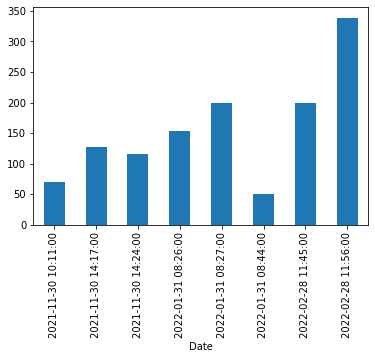

In [120]:
df[df['Date'].dt.is_month_end].groupby("Date")['INR'].sum().plot(kind="bar");